Epoch 1/1500
180/180 - 5s - loss: 9119600640.0000 - mae: 56356.5977 - val_loss: 1136727922049024.0000 - val_mae: 16266286.0000 - lr: 1.0000 - 5s/epoch - 26ms/step
Epoch 2/1500
180/180 - 1s - loss: 9378601984.0000 - mae: 53834.8242 - val_loss: 2484002304.0000 - val_mae: 17459.0508 - lr: 1.0000 - 1s/epoch - 6ms/step
Epoch 3/1500
180/180 - 1s - loss: 801768000.0000 - mae: 12061.8594 - val_loss: 3.8501 - val_mae: 1.9622 - lr: 1.0000 - 1s/epoch - 6ms/step
Epoch 4/1500
180/180 - 1s - loss: 106281288.0000 - mae: 3631.6609 - val_loss: 1219641.7500 - val_mae: 179.4766 - lr: 1.0000 - 1s/epoch - 6ms/step
Epoch 5/1500
180/180 - 1s - loss: 80887088.0000 - mae: 2868.6423 - val_loss: 10250307584.0000 - val_mae: 25332.7695 - lr: 1.0000 - 1s/epoch - 6ms/step
Epoch 6/1500
180/180 - 1s - loss: 51156568.0000 - mae: 2205.6643 - val_loss: 89421127680.0000 - val_mae: 47290.9883 - lr: 1.0000 - 1s/epoch - 6ms/step
Epoch 7/1500
180/180 - 1s - loss: 28419688.0000 - mae: 1518.7836 - val_loss: 3504695672832.0000 -

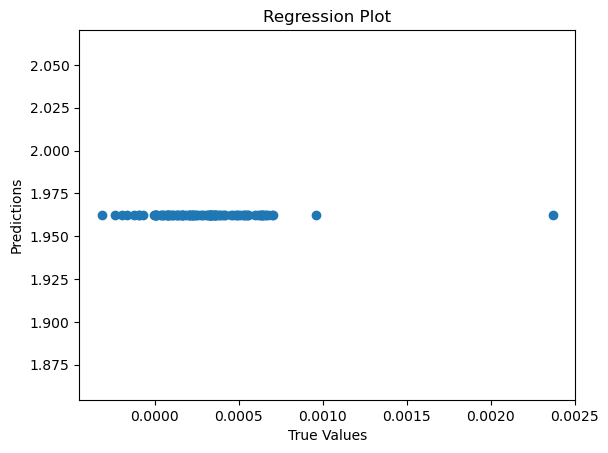

Mean Squared Error (MSE): 3.8499416190737374
R-squared (R2): -38330080.3863768


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Load your dataset from a CSV file
data_path = 'erosion-dataset.csv'
column_names = ["No.", "Inner diameter (mm)", "R/D ratio", "Bending angle (°)",
                 "Bending orientation (°)", "Particle velocity (m/s)",
                 "Particle size (cm)", "Particle Mass flow rate (kg/s)",
                 "Maximum erosion rate -ERmax kg/(m2·s)"]
df = pd.read_csv(data_path, names=column_names, skiprows=1)

# Exclude non-numeric values from the dataset
df = df.apply(pd.to_numeric, errors='coerce').dropna()

# Extract features (X) and target variable (y)
X = df.drop(columns=["Maximum erosion rate -ERmax kg/(m2·s)"])
y = df["Maximum erosion rate -ERmax kg/(m2·s)"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN
X_train_cnn = X_train.values.reshape((-1, 1, X.shape[1], 1))
X_test_cnn = X_test.values.reshape((-1, 1, X.shape[1], 1))

# Create a more complex CNN model
cnn_model = Sequential([
    Conv2D(64, (1, 3), activation='relu', input_shape=(1, X.shape[1], 1)),
    BatchNormalization(),
    Conv2D(128, (1, 3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.9),  # Experiment with the dropout rate
    Dense(128, activation='relu'),
    Dense(1)
])

# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)  # Decay the learning rate after 50 epochs

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Compile the model with an optimizer, learning rate scheduler, and early stopping
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
cnn_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Train the model with learning rate scheduling and early stopping
history = cnn_model.fit(X_train_cnn, y_train, epochs=500, batch_size=2, validation_split=0.1,
                        callbacks=[LearningRateScheduler(lr_scheduler), early_stopping], verbose=2)

# Evaluate the model on the test set
y_pred = cnn_model.predict(X_test_cnn)

# Calculate regression plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Regression Plot')
plt.show()

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Epoch 1/1500
180/180 - 4s - loss: 0.8346 - mae: 0.7130 - val_loss: 0.1725 - val_mae: 0.2977 - lr: 0.0010 - 4s/epoch - 21ms/step
Epoch 2/1500
180/180 - 2s - loss: 0.3177 - mae: 0.4555 - val_loss: 0.3671 - val_mae: 0.4749 - lr: 0.0010 - 2s/epoch - 9ms/step
Epoch 3/1500
180/180 - 1s - loss: 0.2091 - mae: 0.3567 - val_loss: 0.1504 - val_mae: 0.2843 - lr: 0.0010 - 1s/epoch - 6ms/step
Epoch 4/1500
180/180 - 1s - loss: 0.1544 - mae: 0.3085 - val_loss: 0.1224 - val_mae: 0.2700 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 5/1500
180/180 - 1s - loss: 0.1116 - mae: 0.2577 - val_loss: 0.0551 - val_mae: 0.1656 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 6/1500
180/180 - 1s - loss: 0.0783 - mae: 0.2280 - val_loss: 0.1571 - val_mae: 0.3000 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 7/1500
180/180 - 1s - loss: 0.0769 - mae: 0.2166 - val_loss: 0.0366 - val_mae: 0.1423 - lr: 0.0010 - 1s/epoch - 8ms/step
Epoch 8/1500
180/180 - 1s - loss: 0.0516 - mae: 0.1864 - val_loss: 0.0461 - val_mae: 0.1613 - lr: 0.0010 - 1s/

Epoch 62/1500
180/180 - 1s - loss: 1.9655e-07 - mae: 3.5313e-04 - val_loss: 2.3548e-07 - val_mae: 3.3844e-04 - lr: 3.0119e-04 - 1s/epoch - 6ms/step
Epoch 63/1500
180/180 - 1s - loss: 2.2021e-07 - mae: 3.6554e-04 - val_loss: 2.0551e-07 - val_mae: 3.5083e-04 - lr: 2.7253e-04 - 1s/epoch - 6ms/step
Epoch 64/1500
180/180 - 1s - loss: 2.0568e-07 - mae: 3.5635e-04 - val_loss: 1.3644e-07 - val_mae: 2.8772e-04 - lr: 2.4660e-04 - 1s/epoch - 6ms/step
Epoch 65/1500
180/180 - 1s - loss: 1.9972e-07 - mae: 3.4834e-04 - val_loss: 2.0315e-07 - val_mae: 3.0301e-04 - lr: 2.2313e-04 - 997ms/epoch - 6ms/step
Epoch 66/1500
180/180 - 1s - loss: 1.5941e-07 - mae: 3.1901e-04 - val_loss: 1.9595e-07 - val_mae: 3.3706e-04 - lr: 2.0190e-04 - 1s/epoch - 6ms/step
Epoch 67/1500
180/180 - 1s - loss: 1.6219e-07 - mae: 3.1823e-04 - val_loss: 1.0427e-07 - val_mae: 2.5237e-04 - lr: 1.8268e-04 - 1s/epoch - 6ms/step
Epoch 68/1500
180/180 - 1s - loss: 1.6189e-07 - mae: 3.1861e-04 - val_loss: 8.9737e-08 - val_mae: 2.3703e-04 

Epoch 118/1500
180/180 - 1s - loss: 8.9757e-08 - mae: 2.4155e-04 - val_loss: 6.1782e-08 - val_mae: 1.9444e-04 - lr: 1.1138e-06 - 979ms/epoch - 5ms/step
Epoch 119/1500
180/180 - 1s - loss: 8.2647e-08 - mae: 2.3824e-04 - val_loss: 6.3157e-08 - val_mae: 1.9913e-04 - lr: 1.0078e-06 - 1s/epoch - 6ms/step
Epoch 120/1500
180/180 - 1s - loss: 8.8253e-08 - mae: 2.3715e-04 - val_loss: 6.3927e-08 - val_mae: 1.9772e-04 - lr: 9.1188e-07 - 950ms/epoch - 5ms/step
Epoch 121/1500
180/180 - 1s - loss: 7.9425e-08 - mae: 2.2029e-04 - val_loss: 6.3114e-08 - val_mae: 1.9838e-04 - lr: 8.2511e-07 - 938ms/epoch - 5ms/step
Epoch 122/1500
180/180 - 1s - loss: 8.2470e-08 - mae: 2.3133e-04 - val_loss: 6.7578e-08 - val_mae: 2.0390e-04 - lr: 7.4659e-07 - 957ms/epoch - 5ms/step
Epoch 123/1500
180/180 - 1s - loss: 8.2737e-08 - mae: 2.3328e-04 - val_loss: 6.5737e-08 - val_mae: 2.0080e-04 - lr: 6.7554e-07 - 942ms/epoch - 5ms/step
Epoch 124/1500
180/180 - 1s - loss: 7.9218e-08 - mae: 2.2657e-04 - val_loss: 6.7541e-08 - v

Epoch 173/1500
180/180 - 1s - loss: 7.8935e-08 - mae: 2.2127e-04 - val_loss: 6.0869e-08 - val_mae: 1.9586e-04 - lr: 4.5518e-09 - 964ms/epoch - 5ms/step
Epoch 174/1500
180/180 - 1s - loss: 8.0028e-08 - mae: 2.2775e-04 - val_loss: 6.1279e-08 - val_mae: 1.9600e-04 - lr: 4.1186e-09 - 970ms/epoch - 5ms/step
Epoch 175/1500
180/180 - 1s - loss: 7.6714e-08 - mae: 2.1837e-04 - val_loss: 6.2077e-08 - val_mae: 1.9639e-04 - lr: 3.7267e-09 - 1s/epoch - 6ms/step
Epoch 176/1500
180/180 - 1s - loss: 7.8065e-08 - mae: 2.2042e-04 - val_loss: 6.0284e-08 - val_mae: 1.9224e-04 - lr: 3.3720e-09 - 1s/epoch - 6ms/step
Epoch 177/1500
180/180 - 1s - loss: 7.4299e-08 - mae: 2.1711e-04 - val_loss: 6.1135e-08 - val_mae: 1.9496e-04 - lr: 3.0511e-09 - 904ms/epoch - 5ms/step
Epoch 178/1500
180/180 - 1s - loss: 8.0513e-08 - mae: 2.2773e-04 - val_loss: 6.0638e-08 - val_mae: 1.9362e-04 - lr: 2.7608e-09 - 948ms/epoch - 5ms/step
Epoch 179/1500
180/180 - 1s - loss: 7.6737e-08 - mae: 2.2125e-04 - val_loss: 6.0759e-08 - val_

Epoch 228/1500
180/180 - 1s - loss: 7.1547e-08 - mae: 2.1691e-04 - val_loss: 6.0712e-08 - val_mae: 1.9325e-04 - lr: 1.8602e-11 - 1s/epoch - 6ms/step
Epoch 229/1500
180/180 - 1s - loss: 8.3895e-08 - mae: 2.3168e-04 - val_loss: 5.9226e-08 - val_mae: 1.9174e-04 - lr: 1.6832e-11 - 1s/epoch - 6ms/step
Epoch 230/1500
180/180 - 1s - loss: 7.3601e-08 - mae: 2.1547e-04 - val_loss: 6.0597e-08 - val_mae: 1.9329e-04 - lr: 1.5230e-11 - 983ms/epoch - 5ms/step
Epoch 231/1500
180/180 - 1s - loss: 8.0916e-08 - mae: 2.2918e-04 - val_loss: 5.9801e-08 - val_mae: 1.9200e-04 - lr: 1.3781e-11 - 996ms/epoch - 6ms/step
Epoch 232/1500
180/180 - 1s - loss: 7.5429e-08 - mae: 2.2149e-04 - val_loss: 6.1781e-08 - val_mae: 1.9598e-04 - lr: 1.2469e-11 - 980ms/epoch - 5ms/step
Epoch 233/1500
180/180 - 1s - loss: 7.2699e-08 - mae: 2.1329e-04 - val_loss: 6.0521e-08 - val_mae: 1.9283e-04 - lr: 1.1283e-11 - 1s/epoch - 6ms/step
Epoch 234/1500
180/180 - 1s - loss: 7.8662e-08 - mae: 2.2479e-04 - val_loss: 6.0770e-08 - val_mae

Epoch 283/1500
180/180 - 1s - loss: 7.6349e-08 - mae: 2.2414e-04 - val_loss: 6.0803e-08 - val_mae: 1.9450e-04 - lr: 7.6022e-14 - 1s/epoch - 6ms/step
Epoch 284/1500
180/180 - 1s - loss: 7.7321e-08 - mae: 2.2329e-04 - val_loss: 6.0948e-08 - val_mae: 1.9497e-04 - lr: 6.8788e-14 - 1s/epoch - 6ms/step
Epoch 285/1500
180/180 - 1s - loss: 8.1901e-08 - mae: 2.2786e-04 - val_loss: 6.1867e-08 - val_mae: 1.9590e-04 - lr: 6.2242e-14 - 1s/epoch - 8ms/step
Epoch 286/1500
180/180 - 2s - loss: 7.4754e-08 - mae: 2.2328e-04 - val_loss: 6.0336e-08 - val_mae: 1.9265e-04 - lr: 5.6319e-14 - 2s/epoch - 8ms/step
Epoch 287/1500
180/180 - 1s - loss: 7.5812e-08 - mae: 2.1888e-04 - val_loss: 6.0901e-08 - val_mae: 1.9314e-04 - lr: 5.0959e-14 - 1s/epoch - 6ms/step
Epoch 288/1500
180/180 - 1s - loss: 7.3753e-08 - mae: 2.1697e-04 - val_loss: 6.1912e-08 - val_mae: 1.9562e-04 - lr: 4.6110e-14 - 1s/epoch - 6ms/step
Epoch 289/1500
180/180 - 1s - loss: 7.9518e-08 - mae: 2.2556e-04 - val_loss: 6.2330e-08 - val_mae: 1.9741e

Epoch 338/1500
180/180 - 1s - loss: 7.9920e-08 - mae: 2.2859e-04 - val_loss: 6.2269e-08 - val_mae: 1.9670e-04 - lr: 3.1069e-16 - 1s/epoch - 7ms/step
Epoch 339/1500
180/180 - 2s - loss: 7.7263e-08 - mae: 2.2482e-04 - val_loss: 6.0035e-08 - val_mae: 1.9329e-04 - lr: 2.8112e-16 - 2s/epoch - 9ms/step
Epoch 340/1500
180/180 - 2s - loss: 7.4365e-08 - mae: 2.2296e-04 - val_loss: 6.1161e-08 - val_mae: 1.9486e-04 - lr: 2.5437e-16 - 2s/epoch - 9ms/step
Epoch 341/1500
180/180 - 1s - loss: 6.8490e-08 - mae: 2.0932e-04 - val_loss: 6.0817e-08 - val_mae: 1.9139e-04 - lr: 2.3016e-16 - 1s/epoch - 8ms/step
Epoch 342/1500
180/180 - 1s - loss: 7.6138e-08 - mae: 2.2055e-04 - val_loss: 6.1222e-08 - val_mae: 1.9475e-04 - lr: 2.0826e-16 - 1s/epoch - 6ms/step
Epoch 343/1500
180/180 - 1s - loss: 7.0734e-08 - mae: 2.1257e-04 - val_loss: 6.2117e-08 - val_mae: 1.9637e-04 - lr: 1.8844e-16 - 1s/epoch - 6ms/step
Epoch 344/1500
180/180 - 1s - loss: 7.3066e-08 - mae: 2.2020e-04 - val_loss: 6.0916e-08 - val_mae: 1.9419e

Epoch 393/1500
180/180 - 1s - loss: 8.0338e-08 - mae: 2.2613e-04 - val_loss: 5.9147e-08 - val_mae: 1.9144e-04 - lr: 1.2697e-18 - 1s/epoch - 6ms/step
Epoch 394/1500
180/180 - 1s - loss: 7.2409e-08 - mae: 2.1401e-04 - val_loss: 6.1588e-08 - val_mae: 1.9605e-04 - lr: 1.1489e-18 - 1s/epoch - 7ms/step
Epoch 395/1500
180/180 - 1s - loss: 7.9731e-08 - mae: 2.2933e-04 - val_loss: 6.0281e-08 - val_mae: 1.9394e-04 - lr: 1.0395e-18 - 1s/epoch - 7ms/step
Epoch 396/1500
180/180 - 1s - loss: 7.6713e-08 - mae: 2.2267e-04 - val_loss: 5.9686e-08 - val_mae: 1.9311e-04 - lr: 9.4062e-19 - 1s/epoch - 6ms/step
Epoch 397/1500
180/180 - 1s - loss: 7.0992e-08 - mae: 2.1573e-04 - val_loss: 5.9537e-08 - val_mae: 1.9077e-04 - lr: 8.5111e-19 - 1s/epoch - 6ms/step
Epoch 398/1500
180/180 - 1s - loss: 7.8956e-08 - mae: 2.2409e-04 - val_loss: 5.9998e-08 - val_mae: 1.9176e-04 - lr: 7.7011e-19 - 1s/epoch - 7ms/step
Epoch 399/1500
180/180 - 1s - loss: 7.0216e-08 - mae: 2.1242e-04 - val_loss: 5.9684e-08 - val_mae: 1.9187e

Epoch 448/1500
180/180 - 1s - loss: 7.6104e-08 - mae: 2.1777e-04 - val_loss: 6.0967e-08 - val_mae: 1.9447e-04 - lr: 5.1890e-21 - 1s/epoch - 8ms/step
Epoch 449/1500
180/180 - 1s - loss: 7.4757e-08 - mae: 2.2116e-04 - val_loss: 6.0967e-08 - val_mae: 1.9421e-04 - lr: 4.6952e-21 - 1s/epoch - 8ms/step
Epoch 450/1500
180/180 - 1s - loss: 8.0535e-08 - mae: 2.3060e-04 - val_loss: 6.1350e-08 - val_mae: 1.9470e-04 - lr: 4.2484e-21 - 1s/epoch - 6ms/step
Epoch 451/1500
180/180 - 1s - loss: 7.7409e-08 - mae: 2.2065e-04 - val_loss: 5.9979e-08 - val_mae: 1.9258e-04 - lr: 3.8441e-21 - 1s/epoch - 6ms/step
Epoch 452/1500
180/180 - 1s - loss: 7.6655e-08 - mae: 2.2740e-04 - val_loss: 6.0268e-08 - val_mae: 1.9245e-04 - lr: 3.4783e-21 - 1s/epoch - 6ms/step
Epoch 453/1500
180/180 - 1s - loss: 6.9950e-08 - mae: 2.1236e-04 - val_loss: 6.1016e-08 - val_mae: 1.9202e-04 - lr: 3.1473e-21 - 1s/epoch - 7ms/step
Epoch 454/1500
180/180 - 1s - loss: 7.7531e-08 - mae: 2.2454e-04 - val_loss: 6.1179e-08 - val_mae: 1.9356e

Epoch 503/1500
180/180 - 1s - loss: 7.3419e-08 - mae: 2.1609e-04 - val_loss: 6.1004e-08 - val_mae: 1.9514e-04 - lr: 2.1206e-23 - 1s/epoch - 7ms/step
Epoch 504/1500
180/180 - 1s - loss: 7.6645e-08 - mae: 2.2329e-04 - val_loss: 6.2471e-08 - val_mae: 1.9711e-04 - lr: 1.9188e-23 - 1s/epoch - 8ms/step
Epoch 505/1500
180/180 - 1s - loss: 7.5415e-08 - mae: 2.2303e-04 - val_loss: 6.1059e-08 - val_mae: 1.9416e-04 - lr: 1.7362e-23 - 1s/epoch - 6ms/step
Epoch 506/1500
180/180 - 1s - loss: 7.3816e-08 - mae: 2.1129e-04 - val_loss: 6.0520e-08 - val_mae: 1.9389e-04 - lr: 1.5710e-23 - 1s/epoch - 6ms/step
Epoch 507/1500
180/180 - 1s - loss: 7.1925e-08 - mae: 2.1991e-04 - val_loss: 6.2644e-08 - val_mae: 1.9678e-04 - lr: 1.4215e-23 - 1s/epoch - 6ms/step
Epoch 508/1500
180/180 - 1s - loss: 7.1756e-08 - mae: 2.1651e-04 - val_loss: 6.1130e-08 - val_mae: 1.9543e-04 - lr: 1.2862e-23 - 1s/epoch - 8ms/step
Epoch 509/1500
180/180 - 1s - loss: 7.4074e-08 - mae: 2.1475e-04 - val_loss: 6.2587e-08 - val_mae: 1.9585e

Epoch 558/1500
180/180 - 1s - loss: 7.5510e-08 - mae: 2.2084e-04 - val_loss: 6.1525e-08 - val_mae: 1.9395e-04 - lr: 8.6665e-26 - 1s/epoch - 6ms/step
Epoch 559/1500
180/180 - 1s - loss: 7.0643e-08 - mae: 2.1112e-04 - val_loss: 6.0723e-08 - val_mae: 1.9371e-04 - lr: 7.8418e-26 - 1s/epoch - 6ms/step
Epoch 560/1500
180/180 - 1s - loss: 8.0436e-08 - mae: 2.3009e-04 - val_loss: 6.1265e-08 - val_mae: 1.9528e-04 - lr: 7.0955e-26 - 1s/epoch - 6ms/step
Epoch 561/1500
180/180 - 1s - loss: 8.0267e-08 - mae: 2.2700e-04 - val_loss: 6.1173e-08 - val_mae: 1.9548e-04 - lr: 6.4203e-26 - 1s/epoch - 7ms/step
Epoch 562/1500
180/180 - 1s - loss: 7.6147e-08 - mae: 2.2634e-04 - val_loss: 6.0319e-08 - val_mae: 1.9292e-04 - lr: 5.8093e-26 - 1s/epoch - 6ms/step
Epoch 563/1500
180/180 - 1s - loss: 8.1385e-08 - mae: 2.3132e-04 - val_loss: 6.0040e-08 - val_mae: 1.9177e-04 - lr: 5.2565e-26 - 1s/epoch - 6ms/step
Epoch 564/1500
180/180 - 1s - loss: 8.1264e-08 - mae: 2.3279e-04 - val_loss: 6.0327e-08 - val_mae: 1.9266e

Epoch 613/1500
180/180 - 1s - loss: 7.2212e-08 - mae: 2.1579e-04 - val_loss: 6.1159e-08 - val_mae: 1.9465e-04 - lr: 3.5418e-28 - 933ms/epoch - 5ms/step
Epoch 614/1500
180/180 - 1s - loss: 7.7739e-08 - mae: 2.2059e-04 - val_loss: 5.9972e-08 - val_mae: 1.9106e-04 - lr: 3.2048e-28 - 971ms/epoch - 5ms/step
Epoch 615/1500
180/180 - 1s - loss: 7.4944e-08 - mae: 2.1752e-04 - val_loss: 6.1637e-08 - val_mae: 1.9584e-04 - lr: 2.8998e-28 - 964ms/epoch - 5ms/step
Epoch 616/1500
180/180 - 1s - loss: 7.4309e-08 - mae: 2.1723e-04 - val_loss: 6.0652e-08 - val_mae: 1.9321e-04 - lr: 2.6238e-28 - 956ms/epoch - 5ms/step
Epoch 617/1500
180/180 - 1s - loss: 8.1226e-08 - mae: 2.2445e-04 - val_loss: 5.9739e-08 - val_mae: 1.9253e-04 - lr: 2.3741e-28 - 1s/epoch - 6ms/step
Epoch 618/1500
180/180 - 1s - loss: 7.6916e-08 - mae: 2.2213e-04 - val_loss: 6.0961e-08 - val_mae: 1.9292e-04 - lr: 2.1482e-28 - 948ms/epoch - 5ms/step
Epoch 619/1500
180/180 - 1s - loss: 7.9913e-08 - mae: 2.2278e-04 - val_loss: 6.0964e-08 - v

Epoch 668/1500
180/180 - 1s - loss: 7.9790e-08 - mae: 2.2452e-04 - val_loss: 5.8700e-08 - val_mae: 1.9072e-04 - lr: 1.4475e-30 - 1s/epoch - 7ms/step
Epoch 669/1500
180/180 - 1s - loss: 7.4333e-08 - mae: 2.1736e-04 - val_loss: 6.0010e-08 - val_mae: 1.9245e-04 - lr: 1.3097e-30 - 1s/epoch - 6ms/step
Epoch 670/1500
180/180 - 1s - loss: 7.4525e-08 - mae: 2.2488e-04 - val_loss: 6.0888e-08 - val_mae: 1.9277e-04 - lr: 1.1851e-30 - 1s/epoch - 6ms/step
Epoch 671/1500
180/180 - 1s - loss: 7.7898e-08 - mae: 2.2092e-04 - val_loss: 6.1175e-08 - val_mae: 1.9529e-04 - lr: 1.0723e-30 - 1s/epoch - 6ms/step
Epoch 672/1500
180/180 - 1s - loss: 7.6981e-08 - mae: 2.1634e-04 - val_loss: 6.0452e-08 - val_mae: 1.9344e-04 - lr: 9.7026e-31 - 1s/epoch - 6ms/step
Epoch 673/1500
180/180 - 1s - loss: 8.1325e-08 - mae: 2.3276e-04 - val_loss: 6.0332e-08 - val_mae: 1.9430e-04 - lr: 8.7792e-31 - 984ms/epoch - 5ms/step
Epoch 674/1500
180/180 - 1s - loss: 7.7949e-08 - mae: 2.2495e-04 - val_loss: 6.0357e-08 - val_mae: 1.92

Epoch 723/1500
180/180 - 1s - loss: 7.9321e-08 - mae: 2.2612e-04 - val_loss: 6.0037e-08 - val_mae: 1.9224e-04 - lr: 5.9154e-33 - 970ms/epoch - 5ms/step
Epoch 724/1500
180/180 - 1s - loss: 8.6396e-08 - mae: 2.3694e-04 - val_loss: 6.2145e-08 - val_mae: 1.9699e-04 - lr: 5.3525e-33 - 970ms/epoch - 5ms/step
Epoch 725/1500
180/180 - 1s - loss: 7.7422e-08 - mae: 2.2140e-04 - val_loss: 6.2300e-08 - val_mae: 1.9618e-04 - lr: 4.8431e-33 - 964ms/epoch - 5ms/step
Epoch 726/1500
180/180 - 1s - loss: 7.4956e-08 - mae: 2.2289e-04 - val_loss: 6.1142e-08 - val_mae: 1.9395e-04 - lr: 4.3822e-33 - 971ms/epoch - 5ms/step
Epoch 727/1500
180/180 - 1s - loss: 7.5727e-08 - mae: 2.1527e-04 - val_loss: 6.1042e-08 - val_mae: 1.9378e-04 - lr: 3.9652e-33 - 1s/epoch - 6ms/step
Epoch 728/1500
180/180 - 1s - loss: 8.1369e-08 - mae: 2.3174e-04 - val_loss: 6.0517e-08 - val_mae: 1.9346e-04 - lr: 3.5879e-33 - 965ms/epoch - 5ms/step
Epoch 729/1500
180/180 - 1s - loss: 7.5712e-08 - mae: 2.2404e-04 - val_loss: 5.9804e-08 - v

Epoch 778/1500
180/180 - 1s - loss: 7.9211e-08 - mae: 2.2950e-04 - val_loss: 6.1387e-08 - val_mae: 1.9501e-04 - lr: 2.4175e-35 - 964ms/epoch - 5ms/step
Epoch 779/1500
180/180 - 1s - loss: 7.4269e-08 - mae: 2.2085e-04 - val_loss: 5.9249e-08 - val_mae: 1.9153e-04 - lr: 2.1874e-35 - 970ms/epoch - 5ms/step
Epoch 780/1500
180/180 - 1s - loss: 7.7354e-08 - mae: 2.2240e-04 - val_loss: 5.9641e-08 - val_mae: 1.9180e-04 - lr: 1.9793e-35 - 971ms/epoch - 5ms/step
Epoch 781/1500
180/180 - 1s - loss: 7.4134e-08 - mae: 2.1977e-04 - val_loss: 5.9610e-08 - val_mae: 1.9205e-04 - lr: 1.7909e-35 - 955ms/epoch - 5ms/step
Epoch 782/1500
180/180 - 1s - loss: 7.7195e-08 - mae: 2.2109e-04 - val_loss: 6.0540e-08 - val_mae: 1.9491e-04 - lr: 1.6205e-35 - 964ms/epoch - 5ms/step
Epoch 783/1500
180/180 - 1s - loss: 7.8466e-08 - mae: 2.2661e-04 - val_loss: 6.0744e-08 - val_mae: 1.9428e-04 - lr: 1.4663e-35 - 971ms/epoch - 5ms/step
Epoch 784/1500
180/180 - 1s - loss: 7.0545e-08 - mae: 2.1364e-04 - val_loss: 6.1022e-08 

Epoch 833/1500
180/180 - 1s - loss: 7.0813e-08 - mae: 2.1474e-04 - val_loss: 5.9996e-08 - val_mae: 1.9137e-04 - lr: 9.8798e-38 - 1s/epoch - 7ms/step
Epoch 834/1500
180/180 - 1s - loss: 7.6710e-08 - mae: 2.2134e-04 - val_loss: 5.9471e-08 - val_mae: 1.9059e-04 - lr: 8.9396e-38 - 1s/epoch - 7ms/step
Epoch 835/1500
180/180 - 1s - loss: 7.0115e-08 - mae: 2.1195e-04 - val_loss: 6.1146e-08 - val_mae: 1.9378e-04 - lr: 8.0889e-38 - 1s/epoch - 7ms/step
Epoch 836/1500
180/180 - 1s - loss: 7.4281e-08 - mae: 2.2284e-04 - val_loss: 6.0263e-08 - val_mae: 1.9189e-04 - lr: 7.3191e-38 - 1s/epoch - 7ms/step
Epoch 837/1500
180/180 - 1s - loss: 7.4375e-08 - mae: 2.1822e-04 - val_loss: 5.9905e-08 - val_mae: 1.9143e-04 - lr: 6.6226e-38 - 1s/epoch - 7ms/step
Epoch 838/1500
180/180 - 1s - loss: 7.3880e-08 - mae: 2.1793e-04 - val_loss: 6.1323e-08 - val_mae: 1.9591e-04 - lr: 5.9924e-38 - 1s/epoch - 6ms/step
Epoch 839/1500
180/180 - 1s - loss: 7.3342e-08 - mae: 2.1885e-04 - val_loss: 6.0854e-08 - val_mae: 1.9468e

Epoch 888/1500
180/180 - 1s - loss: 7.2912e-08 - mae: 2.1426e-04 - val_loss: 5.9629e-08 - val_mae: 1.9258e-04 - lr: 0.0000e+00 - 1000ms/epoch - 6ms/step
Epoch 889/1500
180/180 - 1s - loss: 8.0232e-08 - mae: 2.2953e-04 - val_loss: 5.9099e-08 - val_mae: 1.9142e-04 - lr: 0.0000e+00 - 956ms/epoch - 5ms/step
Epoch 890/1500
180/180 - 1s - loss: 7.9923e-08 - mae: 2.2595e-04 - val_loss: 5.9488e-08 - val_mae: 1.9129e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 891/1500
180/180 - 1s - loss: 8.0380e-08 - mae: 2.2502e-04 - val_loss: 5.9009e-08 - val_mae: 1.9087e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 892/1500
180/180 - 1s - loss: 7.5350e-08 - mae: 2.1914e-04 - val_loss: 6.1808e-08 - val_mae: 1.9549e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 893/1500
180/180 - 1s - loss: 8.0146e-08 - mae: 2.2606e-04 - val_loss: 5.9678e-08 - val_mae: 1.9226e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 894/1500
180/180 - 1s - loss: 7.8200e-08 - mae: 2.1981e-04 - val_loss: 5.8593e-08 - val_mae: 

Epoch 943/1500
180/180 - 1s - loss: 7.8203e-08 - mae: 2.2522e-04 - val_loss: 6.1086e-08 - val_mae: 1.9554e-04 - lr: 0.0000e+00 - 979ms/epoch - 5ms/step
Epoch 944/1500
180/180 - 1s - loss: 8.0071e-08 - mae: 2.2337e-04 - val_loss: 6.1691e-08 - val_mae: 1.9640e-04 - lr: 0.0000e+00 - 920ms/epoch - 5ms/step
Epoch 945/1500
180/180 - 1s - loss: 8.5760e-08 - mae: 2.3301e-04 - val_loss: 6.0376e-08 - val_mae: 1.9360e-04 - lr: 0.0000e+00 - 992ms/epoch - 6ms/step
Epoch 946/1500
180/180 - 1s - loss: 7.2901e-08 - mae: 2.1660e-04 - val_loss: 6.1882e-08 - val_mae: 1.9722e-04 - lr: 0.0000e+00 - 959ms/epoch - 5ms/step
Epoch 947/1500
180/180 - 1s - loss: 7.1607e-08 - mae: 2.1253e-04 - val_loss: 6.1160e-08 - val_mae: 1.9473e-04 - lr: 0.0000e+00 - 955ms/epoch - 5ms/step
Epoch 948/1500
180/180 - 1s - loss: 7.6278e-08 - mae: 2.2357e-04 - val_loss: 6.2189e-08 - val_mae: 1.9693e-04 - lr: 0.0000e+00 - 948ms/epoch - 5ms/step
Epoch 949/1500
180/180 - 1s - loss: 7.9604e-08 - mae: 2.2994e-04 - val_loss: 6.2638e-08 

Epoch 998/1500
180/180 - 1s - loss: 7.1599e-08 - mae: 2.2173e-04 - val_loss: 6.1319e-08 - val_mae: 1.9426e-04 - lr: 0.0000e+00 - 971ms/epoch - 5ms/step
Epoch 999/1500
180/180 - 1s - loss: 7.5041e-08 - mae: 2.1726e-04 - val_loss: 6.0746e-08 - val_mae: 1.9368e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1000/1500
180/180 - 1s - loss: 7.7891e-08 - mae: 2.2247e-04 - val_loss: 6.0162e-08 - val_mae: 1.9322e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1001/1500
180/180 - 1s - loss: 7.2329e-08 - mae: 2.1773e-04 - val_loss: 6.1288e-08 - val_mae: 1.9448e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1002/1500
180/180 - 1s - loss: 7.5628e-08 - mae: 2.2027e-04 - val_loss: 6.2339e-08 - val_mae: 1.9694e-04 - lr: 0.0000e+00 - 971ms/epoch - 5ms/step
Epoch 1003/1500
180/180 - 1s - loss: 8.0250e-08 - mae: 2.2567e-04 - val_loss: 6.0717e-08 - val_mae: 1.9476e-04 - lr: 0.0000e+00 - 986ms/epoch - 5ms/step
Epoch 1004/1500
180/180 - 1s - loss: 7.5832e-08 - mae: 2.2219e-04 - val_loss: 6.2136e-08 - va

Epoch 1053/1500
180/180 - 1s - loss: 7.8862e-08 - mae: 2.2561e-04 - val_loss: 6.0323e-08 - val_mae: 1.9321e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1054/1500
180/180 - 1s - loss: 7.6707e-08 - mae: 2.2168e-04 - val_loss: 6.1730e-08 - val_mae: 1.9547e-04 - lr: 0.0000e+00 - 1s/epoch - 7ms/step
Epoch 1055/1500
180/180 - 1s - loss: 7.9843e-08 - mae: 2.2499e-04 - val_loss: 6.1527e-08 - val_mae: 1.9609e-04 - lr: 0.0000e+00 - 971ms/epoch - 5ms/step
Epoch 1056/1500
180/180 - 1s - loss: 7.6868e-08 - mae: 2.2517e-04 - val_loss: 6.0301e-08 - val_mae: 1.9397e-04 - lr: 0.0000e+00 - 933ms/epoch - 5ms/step
Epoch 1057/1500
180/180 - 1s - loss: 7.3167e-08 - mae: 2.1792e-04 - val_loss: 6.1958e-08 - val_mae: 1.9722e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1058/1500
180/180 - 1s - loss: 8.0880e-08 - mae: 2.2729e-04 - val_loss: 6.0808e-08 - val_mae: 1.9387e-04 - lr: 0.0000e+00 - 987ms/epoch - 5ms/step
Epoch 1059/1500
180/180 - 1s - loss: 7.8092e-08 - mae: 2.2477e-04 - val_loss: 6.2114e-08 - 

Epoch 1107/1500
180/180 - 1s - loss: 7.7179e-08 - mae: 2.2105e-04 - val_loss: 6.0786e-08 - val_mae: 1.9429e-04 - lr: 0.0000e+00 - 950ms/epoch - 5ms/step
Epoch 1108/1500
180/180 - 1s - loss: 7.3504e-08 - mae: 2.2021e-04 - val_loss: 6.0466e-08 - val_mae: 1.9396e-04 - lr: 0.0000e+00 - 975ms/epoch - 5ms/step
Epoch 1109/1500
180/180 - 1s - loss: 7.5953e-08 - mae: 2.2206e-04 - val_loss: 5.9943e-08 - val_mae: 1.9217e-04 - lr: 0.0000e+00 - 964ms/epoch - 5ms/step
Epoch 1110/1500
180/180 - 1s - loss: 7.9856e-08 - mae: 2.3122e-04 - val_loss: 5.9954e-08 - val_mae: 1.9246e-04 - lr: 0.0000e+00 - 986ms/epoch - 5ms/step
Epoch 1111/1500
180/180 - 1s - loss: 7.7886e-08 - mae: 2.2641e-04 - val_loss: 6.2538e-08 - val_mae: 1.9755e-04 - lr: 0.0000e+00 - 971ms/epoch - 5ms/step
Epoch 1112/1500
180/180 - 1s - loss: 7.6843e-08 - mae: 2.2037e-04 - val_loss: 6.1038e-08 - val_mae: 1.9456e-04 - lr: 0.0000e+00 - 949ms/epoch - 5ms/step
Epoch 1113/1500
180/180 - 1s - loss: 6.9488e-08 - mae: 2.0857e-04 - val_loss: 6.06

Epoch 1161/1500
180/180 - 1s - loss: 7.2194e-08 - mae: 2.1527e-04 - val_loss: 6.1873e-08 - val_mae: 1.9586e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1162/1500
180/180 - 1s - loss: 7.2922e-08 - mae: 2.1780e-04 - val_loss: 6.2448e-08 - val_mae: 1.9725e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1163/1500
180/180 - 1s - loss: 7.8012e-08 - mae: 2.2240e-04 - val_loss: 6.3295e-08 - val_mae: 1.9818e-04 - lr: 0.0000e+00 - 972ms/epoch - 5ms/step
Epoch 1164/1500
180/180 - 1s - loss: 7.8149e-08 - mae: 2.2340e-04 - val_loss: 6.2112e-08 - val_mae: 1.9587e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1165/1500
180/180 - 1s - loss: 7.0726e-08 - mae: 2.1183e-04 - val_loss: 6.1258e-08 - val_mae: 1.9524e-04 - lr: 0.0000e+00 - 971ms/epoch - 5ms/step
Epoch 1166/1500
180/180 - 1s - loss: 7.9676e-08 - mae: 2.2149e-04 - val_loss: 6.0775e-08 - val_mae: 1.9402e-04 - lr: 0.0000e+00 - 965ms/epoch - 5ms/step
Epoch 1167/1500
180/180 - 1s - loss: 7.2891e-08 - mae: 2.1476e-04 - val_loss: 6.0589e-08 - 

Epoch 1215/1500
180/180 - 1s - loss: 7.1636e-08 - mae: 2.1745e-04 - val_loss: 6.1162e-08 - val_mae: 1.9554e-04 - lr: 0.0000e+00 - 954ms/epoch - 5ms/step
Epoch 1216/1500
180/180 - 1s - loss: 8.2990e-08 - mae: 2.3365e-04 - val_loss: 6.0931e-08 - val_mae: 1.9459e-04 - lr: 0.0000e+00 - 934ms/epoch - 5ms/step
Epoch 1217/1500
180/180 - 1s - loss: 7.9569e-08 - mae: 2.2692e-04 - val_loss: 6.0205e-08 - val_mae: 1.9229e-04 - lr: 0.0000e+00 - 956ms/epoch - 5ms/step
Epoch 1218/1500
180/180 - 1s - loss: 8.0222e-08 - mae: 2.2369e-04 - val_loss: 6.0748e-08 - val_mae: 1.9406e-04 - lr: 0.0000e+00 - 970ms/epoch - 5ms/step
Epoch 1219/1500
180/180 - 1s - loss: 7.8144e-08 - mae: 2.2491e-04 - val_loss: 5.9728e-08 - val_mae: 1.9237e-04 - lr: 0.0000e+00 - 959ms/epoch - 5ms/step
Epoch 1220/1500
180/180 - 1s - loss: 7.6807e-08 - mae: 2.2184e-04 - val_loss: 6.0486e-08 - val_mae: 1.9405e-04 - lr: 0.0000e+00 - 951ms/epoch - 5ms/step
Epoch 1221/1500
180/180 - 1s - loss: 7.3745e-08 - mae: 2.1628e-04 - val_loss: 6.20

Epoch 1270/1500
180/180 - 1s - loss: 8.1922e-08 - mae: 2.3001e-04 - val_loss: 5.9681e-08 - val_mae: 1.9300e-04 - lr: 0.0000e+00 - 950ms/epoch - 5ms/step
Epoch 1271/1500
180/180 - 1s - loss: 6.8026e-08 - mae: 2.1221e-04 - val_loss: 6.0202e-08 - val_mae: 1.9349e-04 - lr: 0.0000e+00 - 956ms/epoch - 5ms/step
Epoch 1272/1500
180/180 - 1s - loss: 7.0380e-08 - mae: 2.1178e-04 - val_loss: 6.0929e-08 - val_mae: 1.9456e-04 - lr: 0.0000e+00 - 944ms/epoch - 5ms/step
Epoch 1273/1500
180/180 - 1s - loss: 7.6473e-08 - mae: 2.2556e-04 - val_loss: 6.0658e-08 - val_mae: 1.9401e-04 - lr: 0.0000e+00 - 949ms/epoch - 5ms/step
Epoch 1274/1500
180/180 - 1s - loss: 8.2692e-08 - mae: 2.2993e-04 - val_loss: 6.0705e-08 - val_mae: 1.9517e-04 - lr: 0.0000e+00 - 959ms/epoch - 5ms/step
Epoch 1275/1500
180/180 - 1s - loss: 7.3927e-08 - mae: 2.2174e-04 - val_loss: 6.0855e-08 - val_mae: 1.9441e-04 - lr: 0.0000e+00 - 939ms/epoch - 5ms/step
Epoch 1276/1500
180/180 - 1s - loss: 7.5929e-08 - mae: 2.1900e-04 - val_loss: 6.03

Epoch 1324/1500
180/180 - 1s - loss: 7.2338e-08 - mae: 2.1452e-04 - val_loss: 5.9434e-08 - val_mae: 1.9109e-04 - lr: 0.0000e+00 - 978ms/epoch - 5ms/step
Epoch 1325/1500
180/180 - 1s - loss: 7.4716e-08 - mae: 2.1924e-04 - val_loss: 6.1596e-08 - val_mae: 1.9657e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1326/1500
180/180 - 1s - loss: 7.8917e-08 - mae: 2.2687e-04 - val_loss: 6.2073e-08 - val_mae: 1.9703e-04 - lr: 0.0000e+00 - 967ms/epoch - 5ms/step
Epoch 1327/1500
180/180 - 1s - loss: 8.3001e-08 - mae: 2.3103e-04 - val_loss: 6.0414e-08 - val_mae: 1.9371e-04 - lr: 0.0000e+00 - 964ms/epoch - 5ms/step
Epoch 1328/1500
180/180 - 1s - loss: 7.4221e-08 - mae: 2.1670e-04 - val_loss: 6.0467e-08 - val_mae: 1.9233e-04 - lr: 0.0000e+00 - 962ms/epoch - 5ms/step
Epoch 1329/1500
180/180 - 1s - loss: 7.4097e-08 - mae: 2.1862e-04 - val_loss: 6.2046e-08 - val_mae: 1.9609e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1330/1500
180/180 - 1s - loss: 7.4061e-08 - mae: 2.1817e-04 - val_loss: 6.0875e-08

Epoch 1379/1500
180/180 - 1s - loss: 8.0186e-08 - mae: 2.2522e-04 - val_loss: 6.1787e-08 - val_mae: 1.9708e-04 - lr: 0.0000e+00 - 970ms/epoch - 5ms/step
Epoch 1380/1500
180/180 - 1s - loss: 7.6513e-08 - mae: 2.2146e-04 - val_loss: 6.1338e-08 - val_mae: 1.9470e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1381/1500
180/180 - 1s - loss: 6.9376e-08 - mae: 2.0799e-04 - val_loss: 6.0725e-08 - val_mae: 1.9319e-04 - lr: 0.0000e+00 - 956ms/epoch - 5ms/step
Epoch 1382/1500
180/180 - 1s - loss: 7.7403e-08 - mae: 2.2547e-04 - val_loss: 6.1635e-08 - val_mae: 1.9699e-04 - lr: 0.0000e+00 - 986ms/epoch - 5ms/step
Epoch 1383/1500
180/180 - 1s - loss: 7.0625e-08 - mae: 2.1256e-04 - val_loss: 6.0602e-08 - val_mae: 1.9433e-04 - lr: 0.0000e+00 - 993ms/epoch - 6ms/step
Epoch 1384/1500
180/180 - 1s - loss: 7.5411e-08 - mae: 2.1968e-04 - val_loss: 6.1372e-08 - val_mae: 1.9504e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1385/1500
180/180 - 1s - loss: 7.4933e-08 - mae: 2.2249e-04 - val_loss: 6.0708e-08

Epoch 1434/1500
180/180 - 1s - loss: 7.1719e-08 - mae: 2.1266e-04 - val_loss: 6.0002e-08 - val_mae: 1.9250e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1435/1500
180/180 - 1s - loss: 8.3827e-08 - mae: 2.3118e-04 - val_loss: 6.0314e-08 - val_mae: 1.9222e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1436/1500
180/180 - 1s - loss: 7.6126e-08 - mae: 2.2598e-04 - val_loss: 5.8907e-08 - val_mae: 1.9115e-04 - lr: 0.0000e+00 - 988ms/epoch - 5ms/step
Epoch 1437/1500
180/180 - 1s - loss: 8.3353e-08 - mae: 2.2977e-04 - val_loss: 6.0967e-08 - val_mae: 1.9492e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1438/1500
180/180 - 1s - loss: 8.4871e-08 - mae: 2.3284e-04 - val_loss: 6.0002e-08 - val_mae: 1.9304e-04 - lr: 0.0000e+00 - 955ms/epoch - 5ms/step
Epoch 1439/1500
180/180 - 1s - loss: 7.9094e-08 - mae: 2.2680e-04 - val_loss: 5.9026e-08 - val_mae: 1.9143e-04 - lr: 0.0000e+00 - 886ms/epoch - 5ms/step
Epoch 1440/1500
180/180 - 1s - loss: 7.8793e-08 - mae: 2.2487e-04 - val_loss: 6.1292e-08 - 

Epoch 1489/1500
180/180 - 1s - loss: 7.3232e-08 - mae: 2.1547e-04 - val_loss: 5.9855e-08 - val_mae: 1.9056e-04 - lr: 0.0000e+00 - 910ms/epoch - 5ms/step
Epoch 1490/1500
180/180 - 1s - loss: 7.4393e-08 - mae: 2.1884e-04 - val_loss: 6.0636e-08 - val_mae: 1.9161e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1491/1500
180/180 - 1s - loss: 7.7083e-08 - mae: 2.1775e-04 - val_loss: 5.9985e-08 - val_mae: 1.9122e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1492/1500
180/180 - 1s - loss: 7.4052e-08 - mae: 2.1877e-04 - val_loss: 6.0208e-08 - val_mae: 1.9251e-04 - lr: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 1493/1500
180/180 - 1s - loss: 7.9730e-08 - mae: 2.2880e-04 - val_loss: 6.0142e-08 - val_mae: 1.9390e-04 - lr: 0.0000e+00 - 963ms/epoch - 5ms/step
Epoch 1494/1500
180/180 - 1s - loss: 7.8466e-08 - mae: 2.2069e-04 - val_loss: 6.0500e-08 - val_mae: 1.9445e-04 - lr: 0.0000e+00 - 958ms/epoch - 5ms/step
Epoch 1495/1500
180/180 - 1s - loss: 7.7881e-08 - mae: 2.2304e-04 - val_loss: 6.2145e-08 - 

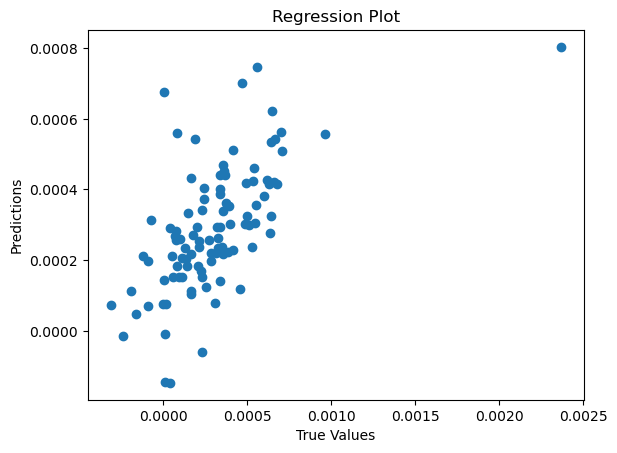

Mean Squared Error (MSE): 6.179619561797707e-08
R-squared (R2): 0.3847560711906587


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Load your dataset from a CSV file
data_path = 'erosion-dataset.csv'
column_names = ["No.", "Inner diameter (mm)", "R/D ratio", "Bending angle (°)",
                 "Bending orientation (°)", "Particle velocity (m/s)",
                 "Particle size (cm)", "Particle Mass flow rate (kg/s)",
                 "Maximum erosion rate -ERmax kg/(m2·s)"]
df = pd.read_csv(data_path, names=column_names, skiprows=1)

# Exclude non-numeric values from the dataset
df = df.apply(pd.to_numeric, errors='coerce').dropna()

# Extract features (X) and target variable (y)
X = df.drop(columns=["Maximum erosion rate -ERmax kg/(m2·s)"])
y = df["Maximum erosion rate -ERmax kg/(m2·s)"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN
X_train_cnn = X_train.values.reshape((-1, 1, X.shape[1], 1))
X_test_cnn = X_test.values.reshape((-1, 1, X.shape[1], 1))

# Create a more complex CNN model
cnn_model = Sequential([
    Conv2D(64, (1, 3), activation='relu', input_shape=(1, X.shape[1], 1)),
    BatchNormalization(),
    Conv2D(128, (1, 3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Experiment with the dropout rate
    Dense(128, activation='relu'),
    Dense(1)
])

# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)  # Decay the learning rate after 50 epochs

# Compile the model with an optimizer, learning rate scheduler, and early stopping
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
cnn_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Train the model with learning rate scheduling and early stopping
history = cnn_model.fit(X_train_cnn, y_train, epochs=1500 , batch_size=2, validation_split=0.1,
                        callbacks=[LearningRateScheduler(lr_scheduler)], verbose=2)

# Evaluate the model on the test set
y_pred = cnn_model.predict(X_test_cnn)

# Calculate regression plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Regression Plot')
plt.show()

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')